In [2]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

In [4]:
len(train_data)

8982

In [5]:
len(test_data)

2246

In [9]:
max([max(sequence) for sequence in train_data])

9999

In [12]:
word_index = reuters.get_word_index()

557056/550378 [==============================] - 0s 0us/step


In [14]:
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])

In [16]:
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [17]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [21]:
set(train_labels)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45}

In [23]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [25]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [28]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [33]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [34]:
model.compile(optimizer='rmsprop', 
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [35]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [37]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 196us/sample - loss: 2.6633 - accuracy: 0.5105 - val_loss: 1.7390 - val_accuracy: 0.6480
Epoch 2/20
7982/7982 [==============================] - 1s 104us/sample - loss: 1.4231 - accuracy: 0.7085 - val_loss: 1.3055 - val_accuracy: 0.7070
Epoch 3/20
7982/7982 [==============================] - 1s 102us/sample - loss: 1.0480 - accuracy: 0.7749 - val_loss: 1.1276 - val_accuracy: 0.7590
Epoch 4/20
7982/7982 [==============================] - 1s 98us/sample - loss: 0.8195 - accuracy: 0.8281 - val_loss: 1.0259 - val_accuracy: 0.7880
Epoch 5/20
7982/7982 [==============================] - 1s 103us/sample - loss: 0.6535 - accuracy: 0.8668 - val_loss: 0.9700 - val_accuracy: 0.7970
Epoch 6/20
7982/7982 [==============================] - 1s 101us/sample - loss: 0.5200 - accuracy: 0.8941 - val_loss: 0.9243 - val_accuracy: 0.8110
Epoch 7/20
7982/7982 [==============================] - 1s 99us/s

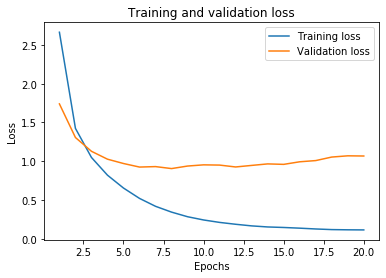

In [42]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show();

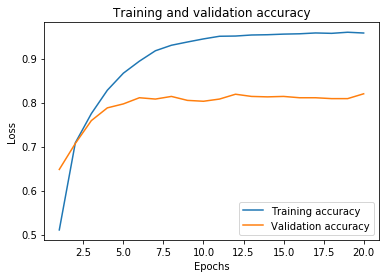

In [43]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show();

In [44]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', 
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 161us/sample - loss: 2.6967 - accuracy: 0.5173 - val_loss: 1.8109 - val_accuracy: 0.6240
Epoch 2/9
7982/7982 [==============================] - 1s 102us/sample - loss: 1.4519 - accuracy: 0.7016 - val_loss: 1.3263 - val_accuracy: 0.7040
Epoch 3/9
7982/7982 [==============================] - 1s 98us/sample - loss: 1.0603 - accuracy: 0.7777 - val_loss: 1.1602 - val_accuracy: 0.7440
Epoch 4/9
7982/7982 [==============================] - 1s 100us/sample - loss: 0.8340 - accuracy: 0.8241 - val_loss: 1.0344 - val_accuracy: 0.7750
Epoch 5/9
7982/7982 [==============================] - 1s 104us/sample - loss: 0.6717 - accuracy: 0.8613 - val_loss: 0.9792 - val_accuracy: 0.7900
Epoch 6/9
7982/7982 [==============================] - 1s 104us/sample - loss: 0.5421 - accuracy: 0.8877 - val_loss: 0.9172 - val_accuracy: 0.8140
Epoch 7/9
7982/7982 [==============================] - 1s 97us/sample -

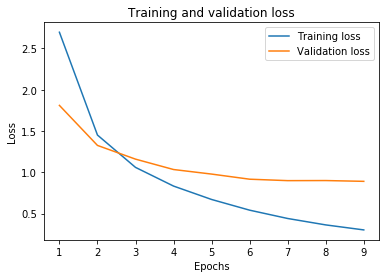

In [46]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show();

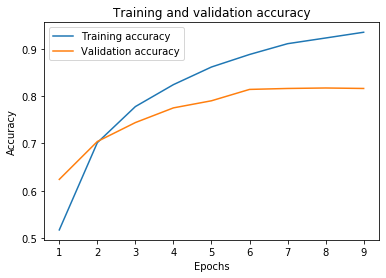

In [47]:
accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']

plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

In [48]:
results = model.evaluate(x_test, one_hot_test_labels)
results

2246/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.9814428174909692, 0.7836153]

In [49]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
np.sum(hits_array) / len(test_labels)

0.18432769367764915

In [50]:
predictions = model.predict(x_test)

In [53]:
predictions[0].shape

(46,)

In [65]:
np.sum(predictions[0])

0.9999999

In [66]:
np.argmax(predictions[0])

3